# [GGUF (Georgi Gerganov Unified Format)](https://github.com/unslothai/unsloth?tab=readme-ov-file)
- GGUF 포맷은 Georgi Gerganov에 의해 개발된 딥러닝 모델 저장용 단일 파일 포맷입니다.
- 이 포맷은 메타데이터와 텐서 데이터를 저장하며, 다양한 양자화를 지원하여 모델의 크기를 줄이고 추론 속도를 높입니다.
- GGUF는 주로 GGML 라이브러리 기반 런타임에서 사용되며, CPU에서도 실행 가능하여 큰 유연성과 확장성을 제공합니다.

## [GGML이란?](https://www.ibm.com/kr-ko/think/topics/gguf-versus-ggml)
- 개발자 게오르기 게르가노프(Georgi Gerganov)가 만든 `GGML`은 `GGUF` 바로 이전의 파일 형식입니다.
- `GGML`은 다양한 하드웨어 플랫폼에서 고성능을 발휘하도록 설계된 텐서 라이브러리였습니다.
- `GGML`은 표준 하드웨어에서 대규모 언어 모델에 액세스할 수 있도록 하기 위한 초기 노력이었습니다. 그러나 유연성과 확장성 측면에서 제한적이었습니다.

`GGUF`는 `GGML` 제한 사항을 해결하고 이전 모델과의 호환성을 유지하면서 새로운 기능을 추가할 수 있게 합니다. `GGUF`는 주요 변경 사항을 제거하여 최신 버전으로의 전환이 용이하게 하고 다양한 모델을 지원하는 포괄적인 솔루션입니다.

## [GGUF 파일에는 두 가지가 기록된다.](https://bitwise-life.tistory.com/4)
1. 모델의 Weight Tensor 값과 텐서 정보
  - Tensor 의 이름
  - Tensor 의 차원 수
  - Tensor 의 Shape
  - Tensor 의 데이터 타입
  - Tensor 데이터가 위치한 Offset
2. Key-Value 형식의 메타데이터
  - Key는 ASCII 문자와 '.' 으로 계층을 표현한다.
    - 다음처럼 쓸 수 있다. llama.attention.head_count_kv
  - 먼저 모델의 세부 정보들이 포함되어야한다. 예를 들어
    - 입력 토큰 길이 (context length)
    - 임베딩 크기 (embedding length)
    - 피드 포워드 길이 (feed forward length)
  - 여기에 추가로 Tokenizer 의 정보도 단일 파일에 포함되어야한다.
    - bos token id
    - eos token id
    - uknown token id
    - seperate token id
    - padding token id
    - Vocab file


## GGUF 장점
- `단일 파일 구조`: 모델을 하나의 파일로 쉽게 공유할 수 있습니다. 이는 모델의 배포와 사용을 간편하게 만듭니다.
- `메타데이터와 텐서 데이터`: 파일 내에 모델의 가중치(weight) 텐서 값들과 메타데이터가 Key-Value 형식으로 저장됩니다. 메타데이터는 모델의 구조, 버전, 텐서 개수 등을 포함합니다.
- `다양한 양자화 지원`: GGUF는 16-bit 부동 소수점(floating point)뿐만 아니라 8-bit, 6-bit, 5-bit, 4-bit, 3-bit, 그리고 2-bit까지의 다양한 양자화된 텐서 타입을 지원합니다. 이는 모델을 더 작게 만들어 추론 속도를 높이고, 메모리 사용을 줄이는 데 유용합니다.

## [Unsloth Models](https://docs.unsloth.ai/get-started/all-our-models)

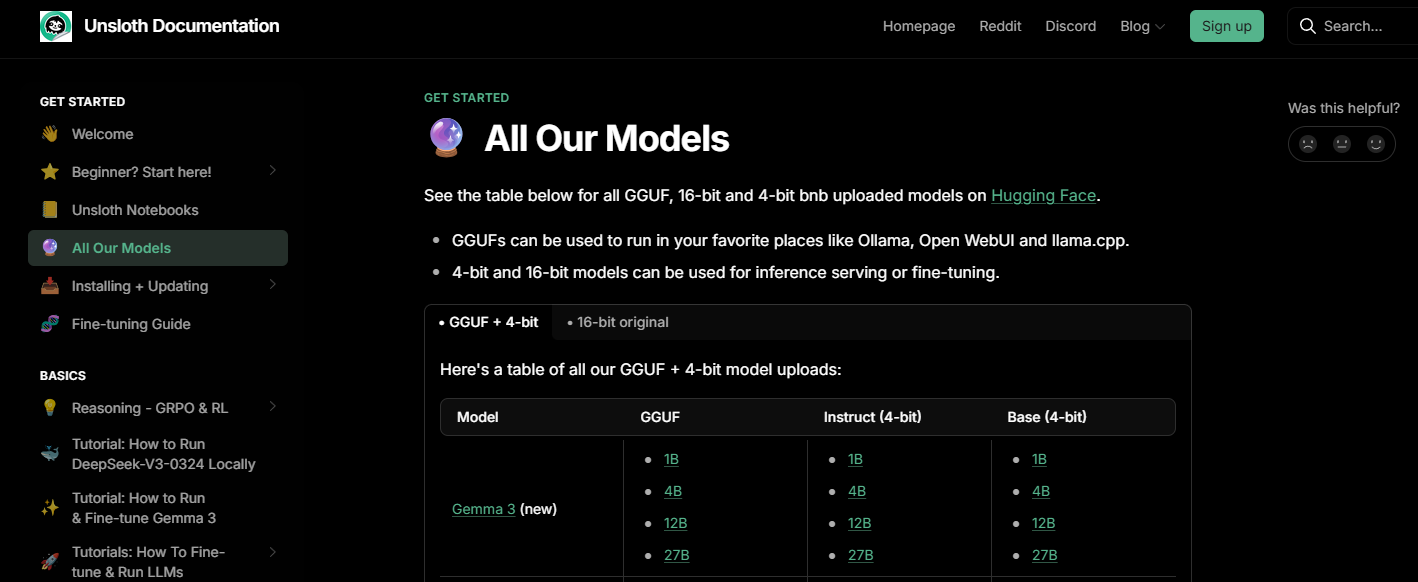

# [예제](https://docs.unsloth.ai/get-started/unsloth-notebooks)

## install

In [1]:
# %%capture
# import os, re
# if "COLAB_" not in "".join(os.environ.keys()):
#     !pip install unsloth
# else:
#     # Do this only in Colab notebooks! Otherwise use pip install unsloth
#     import torch; v = re.match(r"[0-9\.]{3,}", str(torch.__version__)).group(0)
#     xformers = "xformers==" + ("0.0.32.post2" if v == "2.8.0" else "0.0.29.post3")
#     !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
#     !pip install sentencepiece protobuf "datasets>=3.4.1,<4.0.0" "huggingface_hub>=0.34.0" hf_transfer
#     !pip install --no-deps unsloth
# !pip install transformers==4.55.4

In [3]:
!pip install torch==2.8.0
!pip install bitsandbytes==0.47.0
!pip install accelerate==1.10.1
!pip install peft==0.17.1
!pip install trl==0.22.2
!pip install triton==3.4.0
!pip install cut_cross_entropy==25.1.1
!pip install unsloth_zoo==2025.9.2
!pip install sentencepiece==0.2.1
!pip install protobuf==6.32.0
!pip install datasets==3.6.0
!pip install huggingface_hub==0.34.4
!pip install hf_transfer==0.1.9
!pip install unsloth==2025.9.1
!pip install transformers==4.55.4

Name: protobuf
Version: 6.32.0
Summary: 
Home-page: https://developers.google.com/protocol-buffers/
Author: protobuf@googlegroups.com
Author-email: protobuf@googlegroups.com
License: 3-Clause BSD License
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: unsloth, unsloth_zoo
Name: datasets
Version: 3.6.0
Summary: HuggingFace community-driven open-source library of datasets
Home-page: https://github.com/huggingface/datasets
Author: HuggingFace Inc.
Author-email: thomas@huggingface.co
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: dill, filelock, fsspec, huggingface-hub, multiprocess, numpy, packaging, pandas, pyarrow, pyyaml, requests, tqdm, xxhash
Required-by: trl, unsloth, unsloth_zoo
Name: huggingface-hub
Version: 0.34.4
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julie

## [Load Model](https://huggingface.co/unsloth)

In [2]:
from unsloth import FastModel
import torch

fourbit_models = [
    # 4bit dynamic quants for superior accuracy and low memory use
    "unsloth/gemma-3-1b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-12b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-27b-it-unsloth-bnb-4bit",

    # Other popular models!
    "unsloth/Llama-3.1-8B",
    "unsloth/Llama-3.2-3B",
    "unsloth/Llama-3.3-70B",
    "unsloth/mistral-7b-instruct-v0.3",
    "unsloth/Phi-4",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastModel.from_pretrained(
    model_name = "unsloth/gemma-3-4b-it",
    max_seq_length = 2048, # Choose any for long context!
    load_in_4bit = True,  # 4 bit quantization to reduce memory
    load_in_8bit = False, # [NEW!] A bit more accurate, uses 2x memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
    # token = "hf_...", # use one if using gated models
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.9.1: Fast Gemma3 patching. Transformers: 4.55.4.
   \\   /|    NVIDIA RTX A5000. Num GPUs = 1. Max memory: 23.673 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu128. CUDA: 8.6. CUDA Toolkit: 12.8. Triton: 3.4.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/4.56G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json: 0.00B [00:00, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

## PEFT : LoRA

In [3]:
model = FastModel.get_peft_model(
    model,
    finetune_vision_layers     = False, # Turn off for just text!
    finetune_language_layers   = True,  # Should leave on!
    finetune_attention_modules = True,  # Attention good for GRPO
    finetune_mlp_modules       = True,  # SHould leave on always!
    r = 8,           # 0보다 큰 어떤 숫자도 선택 가능! 8, 16, 32, 64, 128이 권장됩니다.
    lora_alpha = 8,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",   # 바이어스를 지원합니다.
    random_state = 3407
)

Unsloth: Making `model.base_model.model.model.language_model` require gradients


## datasets

In [4]:
from datasets import load_dataset

# "teddylee777/QA-Dataset-mini" 데이터셋을 불러옵니다. 훈련 데이터만 사용합니다.
dataset = load_dataset("teddylee777/QA-Dataset-mini", split="train")
# 파일로 불러올 경우 다음 포맷을 따릅니다
# load_dataset("json", data_files="my_file.jsonl")

dataset

README.md:   0%|          | 0.00/339 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/6.20k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16 [00:00<?, ? examples/s]

Dataset({
    features: ['instruction', 'input', 'output'],
    num_rows: 16
})

In [5]:
# EOS_TOKEN은 문장의 끝을 나타내는 토큰입니다. 이 토큰을 추가해야 합니다.
EOS_TOKEN = tokenizer.eos_token

# AlpacaPrompt를 사용하여 지시사항을 포맷팅하는 함수입니다.
alpaca_prompt = """Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{}

### Response:
{}"""


# 주어진 예시들을 포맷팅하는 함수입니다.
def formatting_prompts_func(examples):
    instructions = examples["instruction"]  # 지시사항을 가져옵니다.
    outputs = examples["output"]  # 출력값을 가져옵니다.
    texts = []  # 포맷팅된 텍스트를 저장할 리스트입니다.
    for instruction, output in zip(instructions, outputs):
        # EOS_TOKEN을 추가해야 합니다. 그렇지 않으면 생성이 무한히 진행될 수 있습니다.
        text = alpaca_prompt.format(instruction, output) + EOS_TOKEN
        texts.append(text)
    return {
        "text": texts,  # 포맷팅된 텍스트를 반환합니다.
    }

# 데이터셋에 formatting_prompts_func 함수를 적용합니다. 배치 처리를 활성화합니다.
dataset = dataset.map(
    formatting_prompts_func,
    batched=True,
)

Map:   0%|          | 0/16 [00:00<?, ? examples/s]

In [6]:
dataset[0]

{'instruction': '바이든 대통령이 발표한 행정명령에서 AI 시스템의 안전성과 신뢰성을 확인하기 위해 어떤 조치를 추진하고 있습니까?',
 'input': '',
 'output': '바이든 대통령이 발표한 행정명령에서는 강력한 AI 시스템을 개발하는 기업에게 안전 테스트 결과와 시스템에 관한 주요 정보를 미국 정부와 공유할 것을 요구하고, AI 시스템의 안전성과 신뢰성 확인을 위한 표준 및 AI 생성 콘텐츠 표시를 위한 표준과 모범사례 확립을 추진하고 있습니다.',
 'text': 'Below is an instruction that describes a task. Write a response that appropriately completes the request.\n\n### Instruction:\n바이든 대통령이 발표한 행정명령에서 AI 시스템의 안전성과 신뢰성을 확인하기 위해 어떤 조치를 추진하고 있습니까?\n\n### Response:\n바이든 대통령이 발표한 행정명령에서는 강력한 AI 시스템을 개발하는 기업에게 안전 테스트 결과와 시스템에 관한 주요 정보를 미국 정부와 공유할 것을 요구하고, AI 시스템의 안전성과 신뢰성 확인을 위한 표준 및 AI 생성 콘텐츠 표시를 위한 표준과 모범사례 확립을 추진하고 있습니다.<end_of_turn>'}

In [7]:
from trl import SFTTrainer, SFTConfig

tokenizer.padding_side = "right"  # 토크나이저의 패딩을 오른쪽으로 설정합니다.

# SFTTrainer를 사용하여 모델 학습 설정
trainer = SFTTrainer(
    model=model,  # 학습할 모델
    tokenizer=tokenizer,  # 토크나이저
    train_dataset=dataset,  # 학습 데이터셋
    eval_dataset=dataset,# 테디노트에서 추가된 eval dataset
    dataset_text_field="text",  # 데이터셋에서 텍스트 필드의 이름
    dataset_num_proc=2,  # 데이터 처리에 사용할 프로세스 수
    packing=False,  # 짧은 시퀀스에 대한 학습 속도를 5배 빠르게 할 수 있음
    args=SFTConfig(
        max_seq_length=7994,  # 최대 시퀀스 길이
        per_device_train_batch_size=2,  # 각 디바이스당 훈련 배치 크기
        gradient_accumulation_steps=4,  # 그래디언트 누적 단계
        warmup_steps=5,  # 웜업 스텝 수
        num_train_epochs=3,  # 훈련 에폭 수
        max_steps=100,  # 최대 스텝 수 # 공식문서에는 60
        logging_steps=1,  # logging 스텝 수
        learning_rate=2e-4,  # 학습률
        fp16=not torch.cuda.is_bf16_supported(),  # fp16 사용 여부, bf16이 지원되지 않는 경우에만 사용
        bf16=torch.cuda.is_bf16_supported(),  # bf16 사용 여부, bf16이 지원되는 경우에만 사용
        optim="adamw_8bit",  # 최적화 알고리즘
        weight_decay=0.01,  # 가중치 감소
        lr_scheduler_type="cosine",  # 학습률 스케줄러 유형 # 공식은 linear
        seed=123,  # 랜덤 시드 # 공식은 3407
        output_dir="outputs",  # 출력 디렉토리
    ),
)

num_proc must be <= 16. Reducing num_proc to 16 for dataset of size 16.


Unsloth: Tokenizing ["text"] (num_proc=16):   0%|          | 0/16 [00:00<?, ? examples/s]

num_proc must be <= 16. Reducing num_proc to 16 for dataset of size 16.


## Train

In [8]:
# @title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = NVIDIA RTX A5000. Max memory = 23.673 GB.
4.359 GB of memory reserved.


In [9]:
# @title Training model
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 16 | Num Epochs = 50 | Total steps = 100
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 14,901,248 of 4,314,980,720 (0.35% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,3.183300
2,3.158200
3,3.196600
4,2.980600
5,2.939800
6,2.396700
7,2.339700
8,1.942100
9,1.890000
10,1.848600


In [10]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

213.3431 seconds used for training.
3.56 minutes used for training.
Peak reserved memory = 5.039 GB.
Peak reserved memory for training = 0.68 GB.
Peak reserved memory % of max memory = 21.286 %.
Peak reserved memory for training % of max memory = 2.872 %.


## Inference

In [11]:
from unsloth.chat_templates import get_chat_template
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "gemma-3",
)

In [12]:
messages = [{
    "role": "user",
    "content": [{"type" : "text", "text" : "대한민국의 수도는?",}]
}]
text = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt = True, # Must add for generation
)

from transformers import TextStreamer
_ = model.generate(
    **tokenizer([text], return_tensors = "pt").to("cuda"),
    max_new_tokens = 64, # Increase for longer outputs!
    # Recommended Gemma-3 settings!
    temperature = 1.0, top_p = 0.95, top_k = 64,
    streamer = TextStreamer(tokenizer, skip_prompt = True),
)

대한민국의 수도는 서울입니다.<end_of_turn>


## save model

In [13]:
adapter_model_path = "./unsloth_model_by_finetuning" # 병합을 수행할 베이스 모델

### 원본 모델 저장

In [14]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel

# 1. Base 모델과 LoRA 경로
base_model_path = "unsloth/gemma-3-4b-it"                     # 원본 모델

# 2. Base 모델과 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained(base_model_path)
base_model = AutoModelForCausalLM.from_pretrained(
    base_model_path,
    torch_dtype="auto",
    device_map="auto"
)

base_model.save_pretrained(adapter_model_path)  # Local saving
tokenizer.save_pretrained(adapter_model_path)


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

('./unsloth_model_by_finetuning/tokenizer_config.json',
 './unsloth_model_by_finetuning/special_tokens_map.json',
 './unsloth_model_by_finetuning/chat_template.jinja',
 './unsloth_model_by_finetuning/tokenizer.model',
 './unsloth_model_by_finetuning/added_tokens.json',
 './unsloth_model_by_finetuning/tokenizer.json')

### 학습한 모델 저장

In [16]:
# Hugging Face 형식으로 저장
trainer.save_model(adapter_model_path)  

# model.save_pretrained(base_model)  # Local saving
# tokenizer.save_pretrained(base_model)

### VLLM을 위한 저장

In [17]:
# huggingface_token = ""  # HuggingFace 토큰
# huggingface_repo = "Llama-3-Open-Ko-8B-Instruct-teddynote"  # 모델을 업로드할 repository
save_method = (
    "Q8_0"  # # For now only Q8_0, BF16, F16 supported
)

In [18]:
model.save_pretrained_merged(
    adapter_model_path,
    tokenizer,
    save_method=save_method,  # 저장 방식 설정
)

Found HuggingFace hub cache directory: /root/.cache/huggingface/hub


Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Checking cache directory for required files...
Successfully copied all 2 files from cache to ./unsloth_model_by_finetuning.


Unsloth: Merging weights into 16bit: 100%|██████████| 2/2 [00:38<00:00, 19.00s/it]


### GGUF 변환 및 저장

In [19]:
import os

os.environ["HF_TOKEN"] = "hf_"

In [20]:
# Quantization 방식 설정
quantization_method = "Q8_0"  # For now only Q8_0, BF16, F16 supported

In [21]:
model.save_pretrained_gguf(
    adapter_model_path, # 사전학습 모델이 저장될 폴더명
    tokenizer=tokenizer,
    quantization_type=quantization_method,
)

Unsloth: Updating system package directories
Unsloth: Install GGUF and other packages
Unsloth GGUF:hf-to-gguf:Loading model: unsloth_model_by_finetuning
Unsloth GGUF:hf-to-gguf:Model architecture: Gemma3ForConditionalGeneration
Unsloth GGUF:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
Unsloth GGUF:hf-to-gguf:Exporting model...
Unsloth GGUF:hf-to-gguf:gguf: loading model weight map from 'model.safetensors.index.json'
Unsloth GGUF:hf-to-gguf:gguf: loading model part 'model-00001-of-00002.safetensors'
Unsloth GGUF:hf-to-gguf:token_embd.weight,                 torch.bfloat16 --> Q8_0, shape = {2560, 262208}
Unsloth GGUF:hf-to-gguf:gguf: loading model part 'model-00002-of-00002.safetensors'
Unsloth GGUF:hf-to-gguf:output_norm.weight,                torch.bfloat16 --> F32, shape = {2560}
Unsloth GGUF:hf-to-gguf:Set meta model
Unsloth GGUF:hf-to-gguf:Set model parameters
Unsloth GGUF:hf-to-gguf:Set model quantization version
Unsloth GGUF:hf-to-gguf:Set model tokenizer
Unslo

Unsloth: GGUF conversion:   0%|          | 0/100 [00:00<?, ?it/s]

Unsloth GGUF:hf-to-gguf:Model successfully exported to ./
Unsloth: Converted to unsloth_model_by_finetuning.Q8_0.gguf with size = 4.1G
Unsloth: Successfully saved GGUF to:
unsloth_model_by_finetuning.Q8_0.gguf


['unsloth_model_by_finetuning.Q8_0.gguf']

### GGUG 파일 허깅페이스에 저장

In [24]:
model.push_to_hub_gguf(
    adapter_model_path,
    quantization_type = "Q8_0", # Only Q8_0, BF16, F16 supported
    tokenizer=tokenizer,
    repo_id = "good593/gemma3-finetune-gguf",
    # token = "hf_"
)

Unsloth GGUF:hf-to-gguf:Loading model: unsloth_model_by_finetuning
Unsloth GGUF:hf-to-gguf:Model architecture: Gemma3ForConditionalGeneration
Unsloth GGUF:gguf.gguf_writer:gguf: This GGUF file is for Little Endian only
Unsloth GGUF:hf-to-gguf:Exporting model...
Unsloth GGUF:hf-to-gguf:gguf: loading model weight map from 'model.safetensors.index.json'
Unsloth GGUF:hf-to-gguf:gguf: loading model part 'model-00001-of-00002.safetensors'
Unsloth GGUF:hf-to-gguf:token_embd.weight,                 torch.bfloat16 --> Q8_0, shape = {2560, 262208}
Unsloth GGUF:hf-to-gguf:gguf: loading model part 'model-00002-of-00002.safetensors'
Unsloth GGUF:hf-to-gguf:output_norm.weight,                torch.bfloat16 --> F32, shape = {2560}
Unsloth GGUF:hf-to-gguf:Set meta model
Unsloth GGUF:hf-to-gguf:Set model parameters
Unsloth GGUF:hf-to-gguf:Set model quantization version
Unsloth GGUF:hf-to-gguf:Set model tokenizer
Unsloth GGUF:gguf.vocab:Setting special token type bos to 2
Unsloth GGUF:gguf.vocab:Setting

Unsloth: GGUF conversion:   0%|          | 0/100 [00:00<?, ?it/s]

Unsloth GGUF:hf-to-gguf:Model successfully exported to ./
Unsloth: Converted to unsloth_model_by_finetuning.Q8_0.gguf with size = 4.1G
Unsloth: Successfully saved GGUF to:
unsloth_model_by_finetuning.Q8_0.gguf


No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


['unsloth_model_by_finetuning.Q8_0.gguf']

In [ ]:
#@title 수동 업로드
# from huggingface_hub import HfApi

# api = HfApi()
# api.upload_file(
#     path_or_fileobj="./model.Q8_0.gguf",
#     path_in_repo="model.Q8_0.gguf",
#     repo_id="good593/gemma3-finetune-gguf",
#     repo_type=adapter_model_path,
#     # token = "hf_"
# )

### [hugging face 확인](https://huggingface.co/good593/gemma3-finetune-gguf)

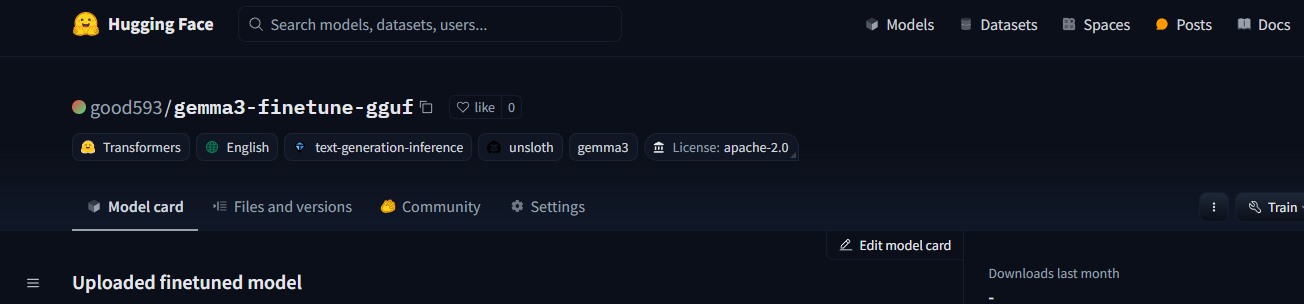

# Ollama

## [install](https://ollama.com/download/windows)

## GGUF 다운로드

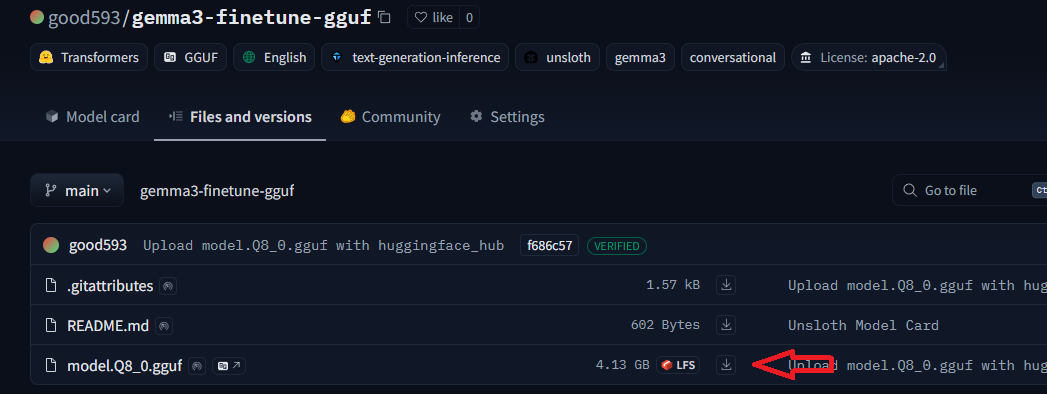

## Modelfile 생성

```Modelfile
FROM model.Q8_0.gguf

TEMPLATE """{{- if .System }}
<s>{{ .System }}</s>
{{- end }}
<s>Human:
{{ .Prompt }}</s>
<s>Assistant:
"""

SYSTEM """A chat between a curious user and an artificial intelligence assistant. The assistant gives helpful, detailed, and polite answers to the user's questions."""

PARAMETER temperature 0
PARAMETER num_predict 3000
PARAMETER num_ctx 4096
PARAMETER stop <s>
PARAMETER stop </s>
```

## Ollama에 등록
```shell
ollama create [모델명] -f Modelfile

ollama list

ollama run [모델명]
```

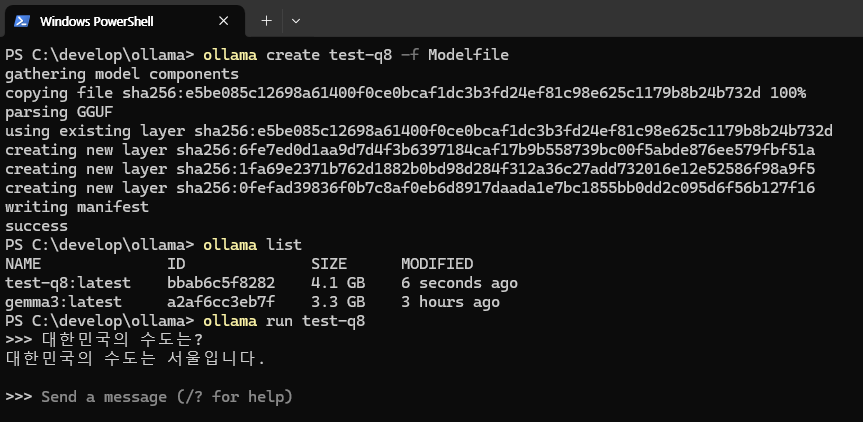

# [허깅페이스의 모델을 이용하여 GGUF 만들기](https://drfirst.tistory.com/entry/llm-%EB%AA%A8%EB%8D%B8%EC%97%90%EC%84%9C-GGUF%EA%B0%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EC%A7%80-%EC%95%8C%EC%95%84%EB%B3%B4%EC%9E%90-feat-bllossom-%EB%AA%A8%EB%8D%B8%EC%9D%84-gguf%EB%A1%9C-%EB%B0%94%EA%BF%94%EB%B3%B4%EA%B8%B0)

## 설치

In [ ]:
from IPython.display import clear_output
!git clone https://github.com/ggerganov/llama.cpp.git
%cd llama.cpp
!apt update
!apt install -y build-essential cmake git libssl-dev libcurl4-openssl-dev
clear_output()

In [ ]:
!pwd

In [ ]:
!make
clear_output()

In [ ]:
%cd /content

In [ ]:
!pwd

## 모델 다운로드

In [ ]:
!pip install huggingface_hub sentencepiece safetensors

In [ ]:
import os
os.environ["HF_TOKEN"] = "hf_"

In [ ]:
###### 필요 디렉토리에서 아래의 .py파일로 모델을 다운받습니다!!#######
from huggingface_hub import snapshot_download
# model_id= "google/gemma-3-1b-it"
# snapshot_download(repo_id=model_id, local_dir="gemma",
#                   local_dir_use_symlinks=False, revision="main")

model_id = "good593/EXAONE-3.5-2.4B-fine-tuning"
snapshot_download(repo_id=model_id, local_dir="exaone",
                  local_dir_use_symlinks=False, revision="main")

## gguf 만들기

In [ ]:
## gguf 만들기 시작!!!
##### llama.cpp/convert-hf-to-gguf.py 파일을 기반으로,
##### bllossom/ 에 있는 파일들을
##### --outfile bllossom.gguf 로 만들어줍니다!!
# !python /content/llama.cpp/convert_hf_to_gguf.py /content/gemma/ --outfile gemma3-1b.gguf

!python /content/llama.cpp/convert_hf_to_gguf.py /content/exaone/ --outfile exaone-4b.gguf


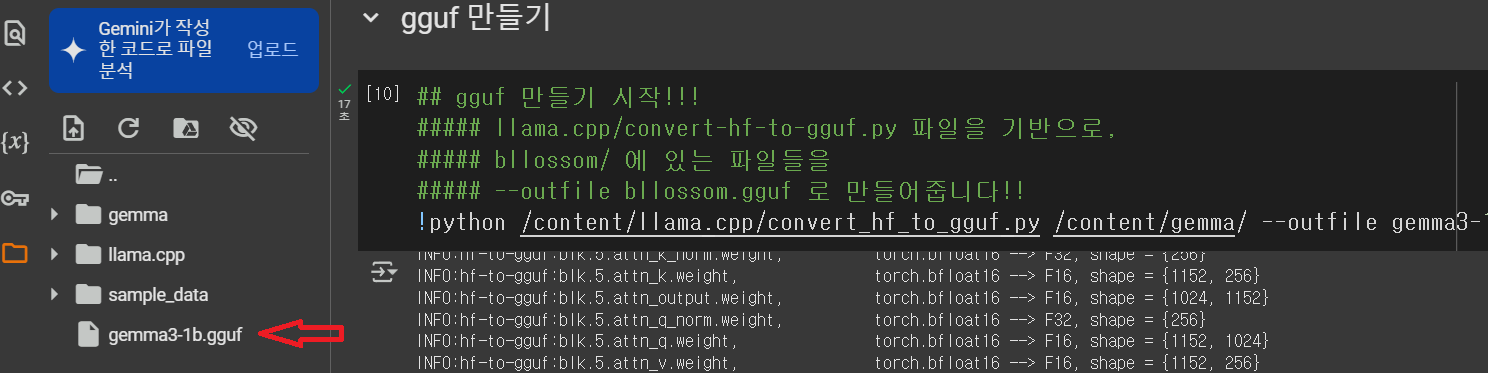